! pip install numpy
! pip install pandas
! pip install matplotlib
! pip install seaborn

In [61]:
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pandas as pd

In [4]:
from models import *

In [5]:
df = pd.read_csv('dane.data', sep='\t', names=[f'x{i}' for i in range(1, 7)]+['y'])
class MinMaxScaler:
    def __init__(self, A):
        self.shift = A.min(axis=0)
        self.factor = A.max(axis=0)-A.min(axis=0)

    def scale(self, A):
        return (A-self.shift)/self.factor

df_res = df.drop('y', axis=1)
scaler = MinMaxScaler(df_res)
df_res = scaler.scale(df_res)
df_res['y'] = df['y']
df_res
# df_res.to_csv('dane_skalowane.data', sep='\t', index=False)

,x1,x2,x3,x4,x5,x6,y
0,0.0,0.000000,0.0,0.052632,1.000000,0.421053,235.53
1,0.0,0.862069,0.0,0.315789,0.333333,0.315789,330.16
2,0.0,0.931034,0.0,0.526316,0.333333,0.473684,355.29
3,0.0,0.931034,0.0,0.842105,0.666667,1.000000,190.74
4,0.0,0.482759,0.0,0.947368,0.000000,0.210526,567.06
...,...,...,...,...,...,...,...
1994,1.0,0.068966,1.0,0.421053,0.222222,0.578947,506.64
1995,1.0,0.344828,1.0,0.684211,0.333333,0.263158,383.56
1996,1.0,0.137931,1.0,0.789474,0.333333,0.736842,520.09
1997,1.0,0.068966,1.0,0.842105,0.222222,0.000000,275.48


In [77]:
df = pd.read_csv('dane_skalowane.data', sep='\t', names=[f'x{i}' for i in range(1, 7)]+['y'])

for i in range(1,7):
    # df[f'sin_x{i}'] = np.sin(df[f'x{i}'])
    # df[f'cos_x{i}'] = np.cos(df[f'x{i}'])
    for j in range(2,10):
        df[f'x{i}^{j}']=df[f'x{i}']**j
    df[f'x{i}g']= np.exp(-(df[f'x{i}']-np.mean(df[f'x{i}'])/2)**2)
    # df[f'x{i}g']= np.exp(-(df[f'x{i}']-np.mean(df[f'x{i}'])/3)**2)
    # df[f'x{i}g']= np.exp(-(df[f'x{i}']-np.mean(df[f'x{i}']))**2)
    for j in range(i+1,7):
        df[f'x{i}*{j}']=df[f'x{i}']*df[f'x{j}']
# df['yy'] = df['y']
df

,x1,x2,x3,x4,x5,x6,y,x1^2,x1^3,x1^4,...,x5*6,x6^2,x6^3,x6^4,x6^5,x6^6,x6^7,x6^8,x6^9,x6g
0,0.0,0.000000,0.0,0.052632,1.000000,0.421053,235.53,0.0,0.0,0.0,...,0.421053,0.177285,0.074646,0.031430,0.013234,0.005572,0.002346,0.000988,4.159369e-04,0.970415
1,0.0,0.862069,0.0,0.315789,0.333333,0.315789,330.16,0.0,0.0,0.0,...,0.105263,0.099723,0.031491,0.009945,0.003140,0.000992,0.000313,0.000099,3.123049e-05,0.995382
2,0.0,0.931034,0.0,0.526316,0.333333,0.473684,355.29,0.0,0.0,0.0,...,0.157895,0.224377,0.106284,0.050345,0.023848,0.011296,0.005351,0.002535,1.200605e-03,0.950237
3,0.0,0.931034,0.0,0.842105,0.666667,1.000000,190.74,0.0,0.0,0.0,...,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,0.567865
4,0.0,0.482759,0.0,0.947368,0.000000,0.210526,567.06,0.0,0.0,0.0,...,0.000000,0.044321,0.009331,0.001964,0.000414,0.000087,0.000018,0.000004,8.123768e-07,0.998615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1.0,0.068966,1.0,0.421053,0.222222,0.578947,506.64,1.0,1.0,1.0,...,0.128655,0.335180,0.194052,0.112346,0.065042,0.037656,0.021801,0.012622,7.307213e-03,0.896114
1995,1.0,0.344828,1.0,0.684211,0.333333,0.263158,383.56,1.0,1.0,1.0,...,0.087719,0.069252,0.018224,0.004796,0.001262,0.000332,0.000087,0.000023,6.052679e-06,0.999763
1996,1.0,0.137931,1.0,0.789474,0.333333,0.736842,520.09,1.0,1.0,1.0,...,0.245614,0.542936,0.400058,0.294780,0.217206,0.160047,0.117929,0.086895,6.402800e-02,0.787253
1997,1.0,0.068966,1.0,0.842105,0.222222,0.000000,275.48,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.940463


<Axes: xlabel='x6', ylabel='y'>

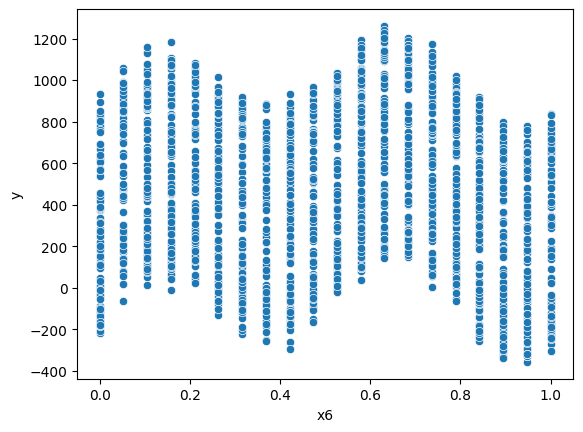

In [68]:
# sns.pointplot(df, x='x1', y='y')
sns.scatterplot(df, x='x6', y='y')

In [78]:
def partition(train, valid):
    assert train + valid <= 1
    
    df_train = df.sample(frac=train, random_state=1234)
    df_valid = df.drop(df_train.index).sample(frac=valid/(1-train), random_state=1234)
    df_test = df.drop(df_train.index).drop(df_valid.index)
    return df_train, df_valid, df_test

df_train, df_valid, df_test = partition(6/10, 2/10)
print("train: ", df_train.shape)
print("validate: ", df_valid.shape)
print("test: ", df_test.shape)

train:  (1199, 76)
validate:  (400, 76)
test:  (400, 76)


In [79]:
def get_data(df):
    y = df['y'].to_numpy()
    y = y.reshape([y.shape[0], 1])

    X = df.drop('y', axis=1)
    X.insert(0, 'x0', [1] * df.shape[0])
    X = X.to_numpy()
    
    return X, y

train_X, train_y = get_data(df_train)
valid_X, valid_y = get_data(df_valid)
test_X, test_y = get_data(df_test)
train_X.shape, train_y.shape

((1199, 76), (1199, 1))

In [71]:
def plot(model, thetas, X, y, step, label=''):
    epochs = [ep for ep in range(0, len(thetas), step)]

    train_losses = [model._mse(y, model.pred(X, theta), theta) for theta in thetas[::step]]
    train_data = {'epoch': epochs[2:], 'loss': train_losses[2:]}
    sns.lineplot(data=pd.DataFrame(train_data), x='epoch', y='loss', label=label)

In [31]:
train_X.shape

array([[1.00000000e+00, 2.60869565e-01, 0.00000000e+00, ...,
        1.50904178e-01, 7.45680065e-01, 4.52010000e+02],
       [1.00000000e+00, 3.04347826e-01, 1.03448276e-01, ...,
        1.50733977e-08, 9.79900684e-01, 2.46090000e+02],
       [1.00000000e+00, 2.17391304e-01, 1.03448276e-01, ...,
        3.39434133e-04, 9.85545301e-01, 5.51420000e+02],
       ...,
       [1.00000000e+00, 8.69565217e-02, 0.00000000e+00, ...,
        4.10735805e-01, 6.57977256e-01, 6.03670000e+02],
       [1.00000000e+00, 9.56521739e-01, 5.17241379e-01, ...,
        2.30001796e-05, 9.99762793e-01, 1.46010000e+02],
       [1.00000000e+00, 7.82608696e-01, 2.75862069e-01, ...,
        1.00000000e+00, 5.67864836e-01, 1.83520000e+02]])

## Least Squares + No Regularization

In [52]:
ls_model = LeastSquaresModel(train_X, train_y)
thetas, loss = ls_model.train(100000, step_size=0.1)
print(f'theta:\t{np.reshape(np.round(thetas[-1],2), thetas[-1].shape[0])}\nloss:\t{loss}')
print(train_X)

theta:	[  606.43 -1357.68  -880.98    90.08   754.52  -294.54 -2510.12  1132.87
  1071.05  -120.9   -916.61   286.54  2779.64]
loss:	121420.49186113328
[[1.         0.26086957 0.         ... 0.78004444 0.42995636 0.70998273]
 [1.         0.30434783 0.10344828 ... 0.50235115 0.22039774 0.10506887]
 [1.         0.2173913  0.10344828 ... 0.         0.22039774 0.36014289]
 ...
 [1.         0.08695652 0.         ... 0.84147098 0.84147098 0.78004444]
 [1.         0.95652174 0.51724138 ... 0.26013102 0.22039774 0.26013102]
 [1.         0.7826087  0.27586207 ... 0.15723948 0.         0.84147098]]


In [53]:
ls_model.analytical()
theta,loss = ls_model.analytical()
print(f'theta:\t{np.reshape(np.round(theta,2), theta.shape[0])}\nloss:\t{loss}')

theta:	[  586.64 -1596.86 -1017.88   114.34   911.81  -278.35 -2895.47  1411.06
  1231.44  -149.25 -1100.74   268.44  3228.4 ]
loss:	121307.90237031915


126282.23061552718
126282.23061552718


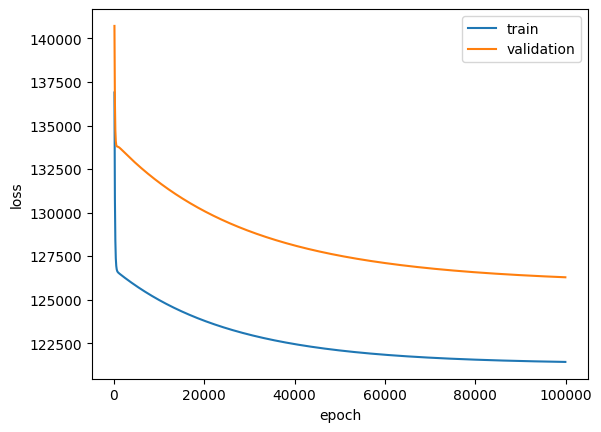

In [54]:
print(np.mean((ls_model.pred(valid_X, thetas[-1])-valid_y)**2))
print(ls_model._mse(valid_y, ls_model.pred(valid_X, thetas[-1]), thetas[-1]))
plot(ls_model, thetas, train_X, train_y, step=50, label='train')
plot(ls_model, thetas, valid_X, valid_y, step=50, label='validation')

## Least Squares + Ridge Regularization

In [80]:
rls_model = RidgeLSModel(train_X, train_y, 0.0000001)
thetas, loss = rls_model.train(100000, step_size=0.15)
print(f'theta:\t{np.reshape(np.round(thetas[-1],2), thetas[-1].shape[0])}\nloss:\t{loss}')

KeyboardInterrupt: 

In [81]:
theta,loss = rls_model.analytical()
print(f'theta:\t{np.reshape(np.round(theta,2), theta.shape[0])}\nloss:\t{loss}')

theta:	[-5.89998500e+04 -4.93972900e+04  1.31244500e+04  1.19206000e+04
  9.38253000e+03  1.34785100e+04 -1.81516800e+04  1.10093790e+05
 -3.30464200e+05  1.17770143e+06 -1.10838775e+06 -4.12269070e+05
  7.71119960e+05  1.46273770e+05 -2.60039010e+05  1.20361980e+05
  7.32300000e+01  7.40000000e+00  1.33200000e+01 -8.10000000e-01
  1.70800000e+01 -2.47723100e+04 -1.43841000e+03 -1.88347700e+04
  4.03245500e+04 -9.10402000e+03 -2.86760900e+04  2.63390900e+04
 -7.17263000e+03 -2.76439500e+04 -2.60000000e-01 -6.21000000e+00
 -7.58700000e+01  2.85000000e+00 -2.24149500e+04 -4.82999000e+03
  2.53833000e+03  6.34047000e+03 -2.35829000e+03 -5.73602000e+03
  1.18210300e+04 -6.28432000e+03 -2.45516500e+04  9.22400000e+01
  9.50000000e-01 -7.73000000e+00 -1.40179500e+04 -2.51721400e+04
  4.13012600e+04 -2.63444300e+04 -1.11072000e+03  1.51378500e+04
 -7.72087000e+03  5.66850000e+02 -2.14280300e+04 -1.71000000e+00
 -3.73000000e+00 -2.52651400e+04 -2.89672000e+03 -1.00832100e+04
  1.59497200e+04  

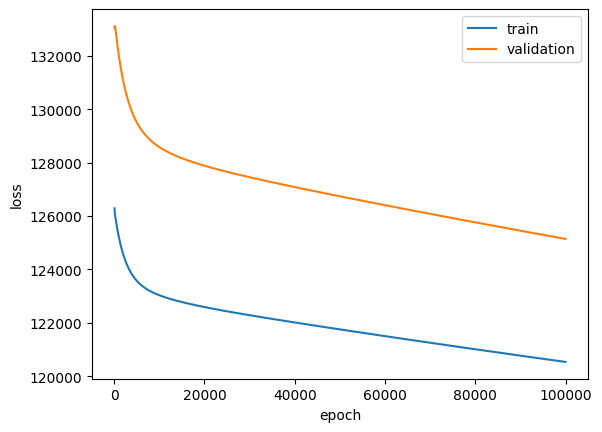

In [76]:
plot(rls_model, thetas, train_X, train_y, step=50, label='train')
plot(rls_model, thetas, valid_X, valid_y, step=50, label='validation')

## Least Squares + Lasso Regularization

In [76]:
lls_model = LassoLSModel(train_X, train_y, 0.000001)
thetas, loss = lls_model.train(10000, step_size=0.01)
print(f'theta: \t{np.reshape(np.round(thetas[-1],4), thetas[-1].shape[0])}\nloss:\t{loss}')

theta: 	[ 139.5302 -116.803    84.0455   23.096   -56.9331   20.093    75.8194
  140.5321  116.2665   -1.7599  -96.715  -140.6825 -139.6447 -107.1664
  -55.6105 -132.2652  -17.8051  -51.1226 -142.6476 -129.4216   12.836
   59.4262   35.263    14.1372   -4.8481  -21.7656  -36.3002  -48.4792
  -58.4942  128.7887 -158.041    22.0375   61.8279  -16.7398    2.3944
    1.9227    3.4622    5.5039    8.0635   10.9559   13.915    16.7291
  124.8776   12.4335   11.0093   24.2829  -27.6619    3.1115   21.7626
   30.6592   33.0034   31.2196   26.9702   21.3461   81.1229   38.4812
  -28.8854  -31.7541  -23.6882   -7.7239    4.4407   11.6172   14.7198
   15.0297   13.6076  152.5042  -83.1242   95.8121   42.3555  -29.1258
  -80.6576 -104.8755 -106.0031  -90.6059  -64.5362   84.3491]
loss:	113536.32924586615


In [77]:
theta,loss = lls_model.analytical()
print(f'theta:\t{np.reshape(np.round(theta,2), theta.shape[0])}\nloss:\t{loss}')

theta:	[ 4.54191647e+12  3.93593652e+10  3.10159602e+10  8.11870280e+12
  3.42377958e+09 -7.68959129e+08 -5.84506364e+06 -2.00359155e+10
 -3.28623289e+10  1.85696708e+09  1.31878700e+10  2.84438852e+09
 -5.75000802e+09  9.57325691e+08  2.07078010e+08 -5.06903536e+10
 -3.85300000e+01 -8.94920000e+02 -6.15440000e+02 -2.90050000e+02
  1.25186000e+03 -1.57510816e+10 -2.59514363e+10  1.73896099e+09
  9.58802417e+09  3.54350048e+09 -5.77293964e+09  1.40541161e+09
  1.89078762e+07 -3.99318773e+10 -5.04200000e+02 -1.38590000e+02
  6.35820000e+02  5.23360000e+02 -3.74815786e+13  1.03815265e+14
 -9.55108931e+13 -5.30217252e+13  7.03388921e+13  3.38634005e+13
  4.88469441e+12 -3.49432740e+13 -5.77853734e+12  8.36000000e+01
 -2.29630000e+02  1.61800000e+02 -1.73929658e+09 -2.84262812e+09
  9.62811174e+07  1.29704105e+09  3.00592956e+07 -3.14584619e+08
 -1.47768468e+06  3.39282955e+07 -4.40699900e+09 -1.74580000e+02
  2.34810000e+02  3.96900533e+08  5.52066343e+08  3.72682974e+08
 -1.33882294e+09  

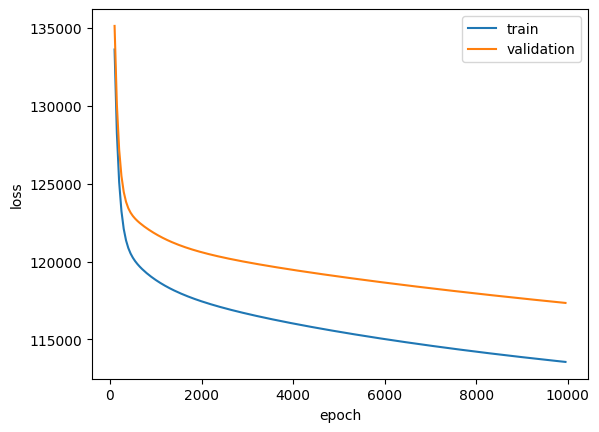

In [78]:
plot(lls_model, thetas, train_X, train_y, step=50, label='train')
plot(lls_model, thetas, valid_X, valid_y, step=50, label='validation')

## Elastic Net